In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import warnings
import joblib
%matplotlib inline
warnings.filterwarnings('ignore')


In [86]:
df=pd.read_csv('abalone.csv')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df.shape

(4177, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


we see that except Sex all other features are float and target variable is integer

In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null values to be treated

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Since there is no much difference between mean and median all the columns are close to normal distribution.We can recheck by finding skewness

# Exploratory Data Analysis

# #univariate analysis

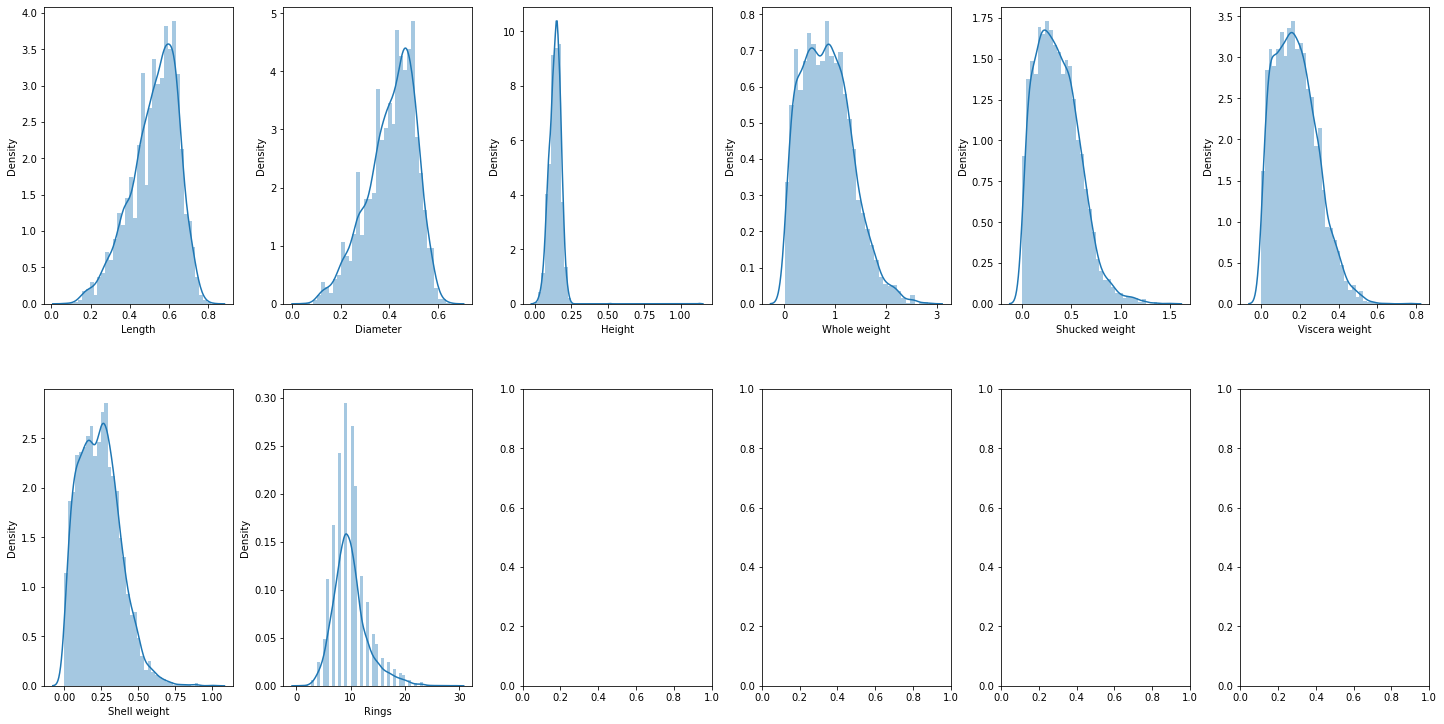

In [12]:
#create dist plot
fig, ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col!='Sex':
        sns.distplot(value,ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Height is skewed

In [13]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Height has highest skewedness followed by age, Shucked weight (can be cross verified through histogram plot)

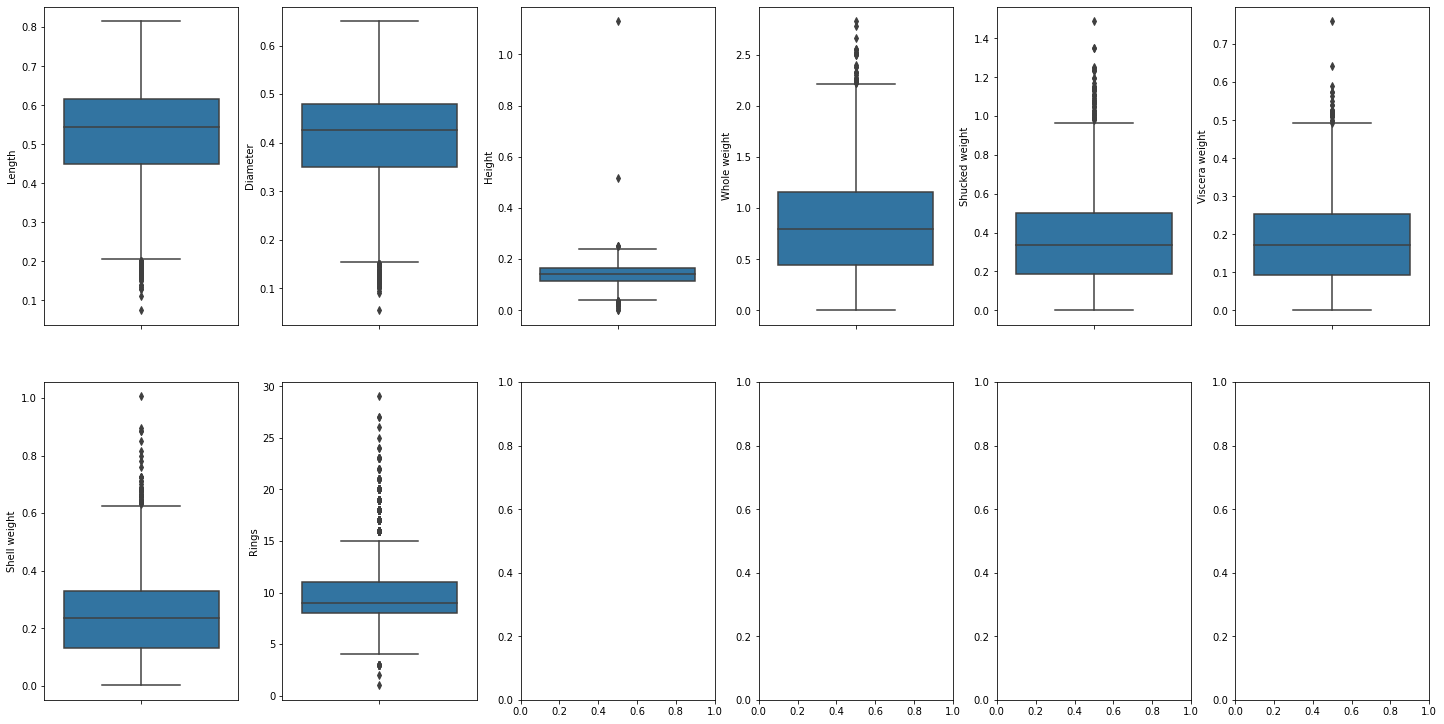

In [14]:
#create box plot
fig, ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col!='Sex':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

We see that there outliers present in almost all the features and need to be corrected

## Bivariate Analysis

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

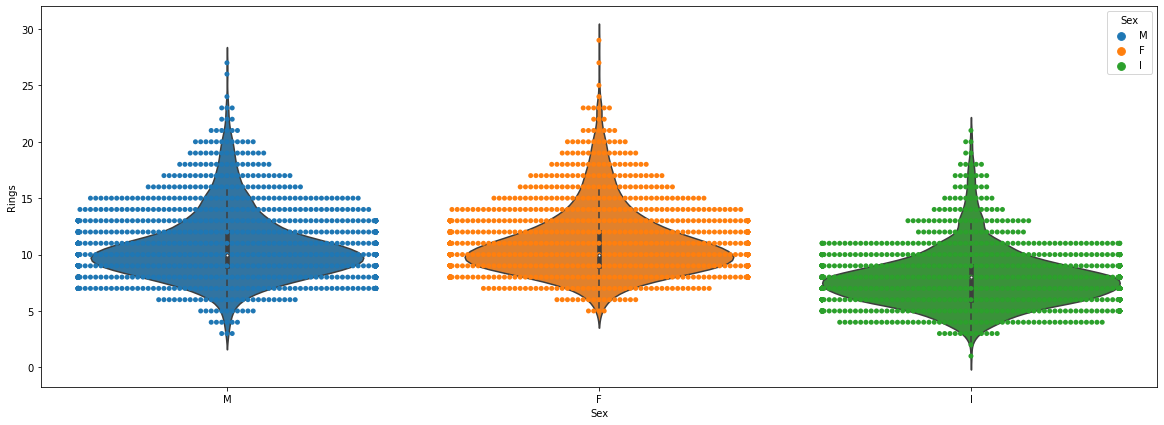

In [17]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Rings', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Rings', data = df)

    Male : Rings(Age) majority lies in between 7.5 years to 19 years
    Female: Rings(Age) majority lies in between 8 years to 19 years
    Immature: Rings(Age) majority lies in between 6 years to 10 years

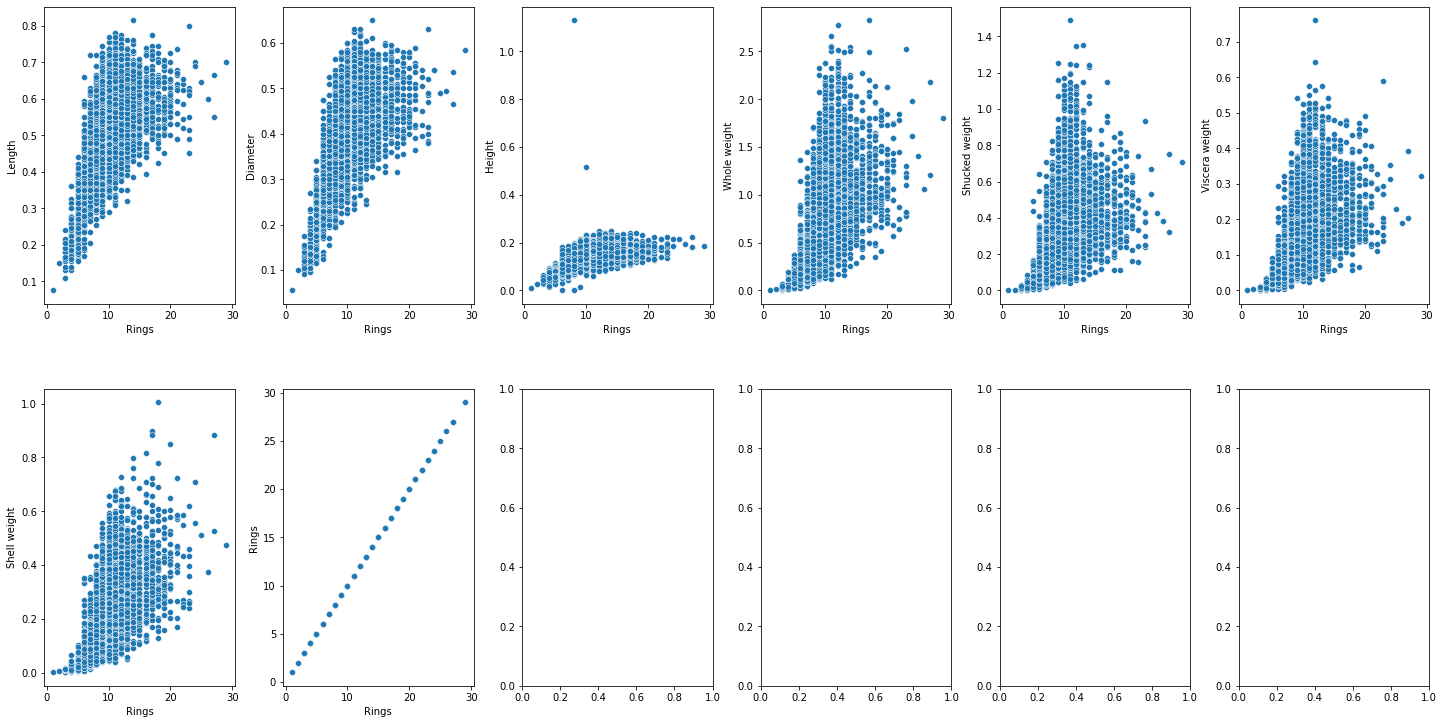

In [19]:
#bivariate analysis
fig, ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
        if col != 'Sex':
            sns.scatterplot(df['Rings'],df[col],ax=ax[index])
            index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


We could see that there is linear relationship between features and target

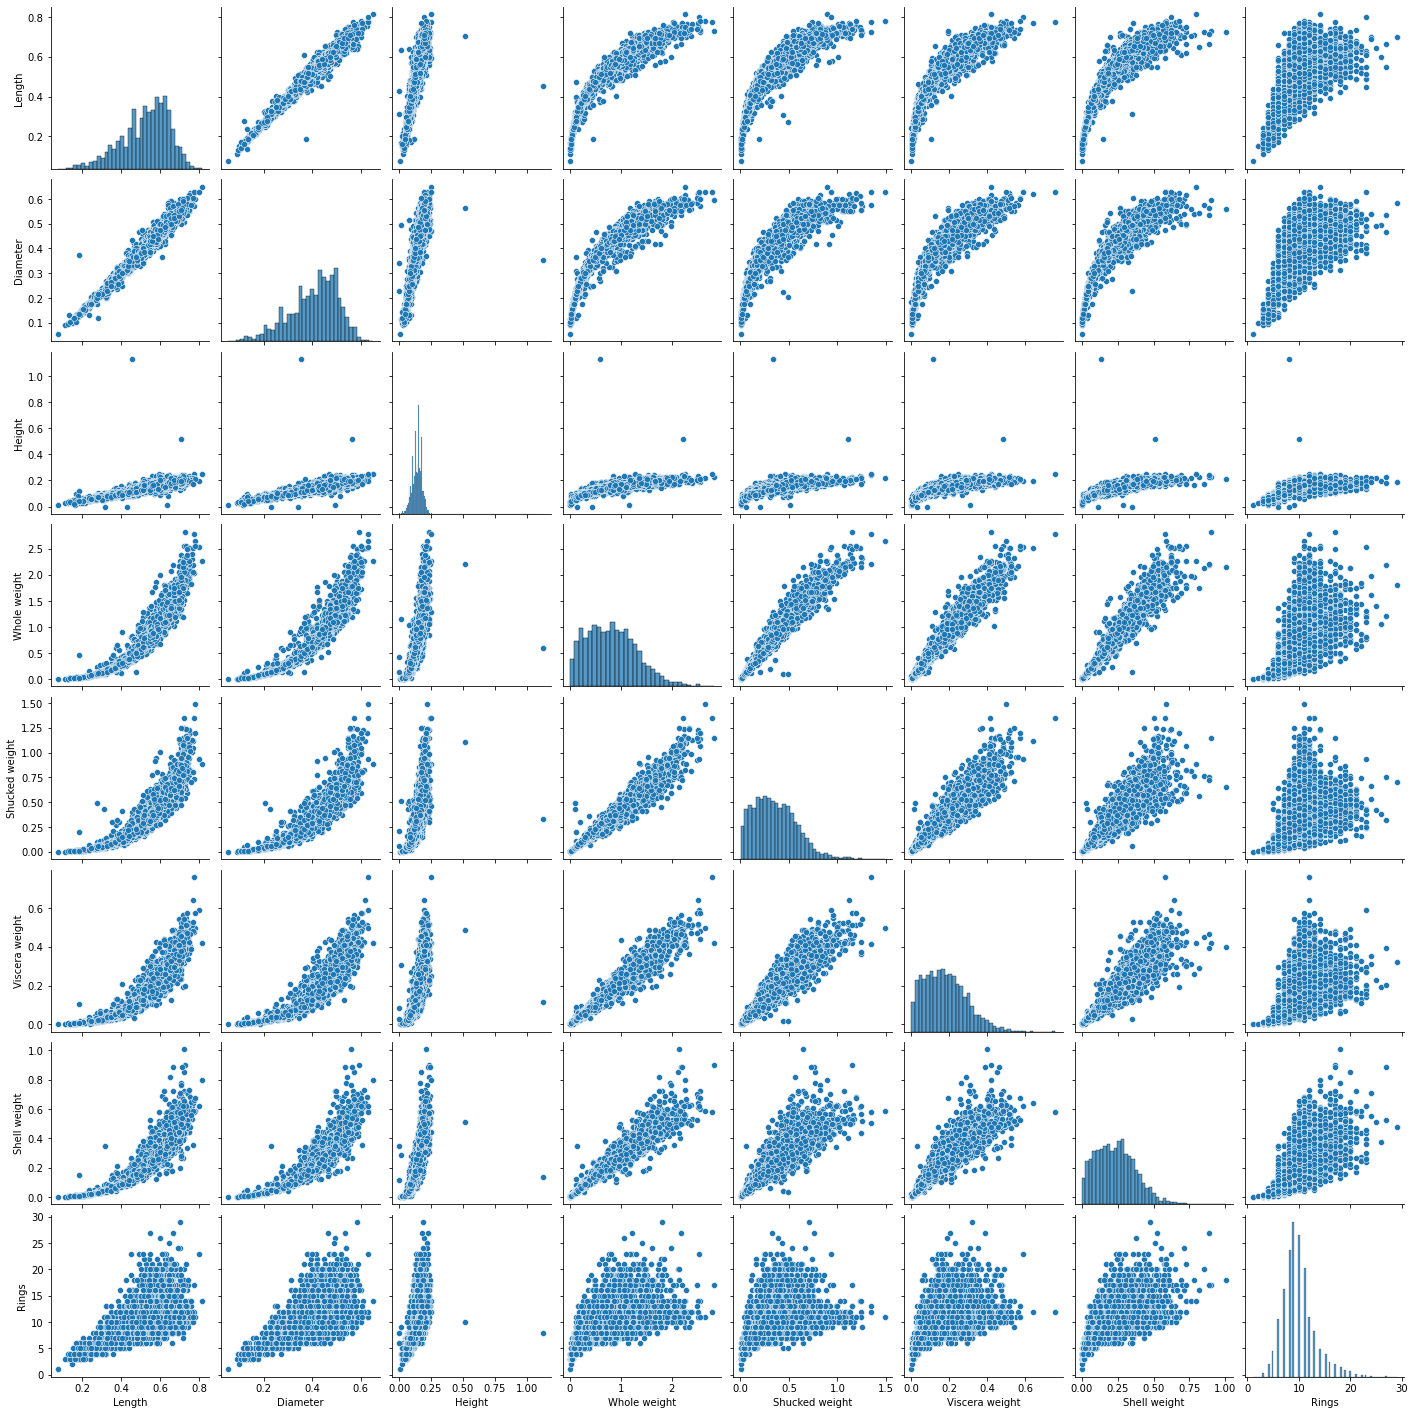

In [22]:
sns.pairplot(df)

Diameter and length linearly related

# Checking corelation

In [24]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

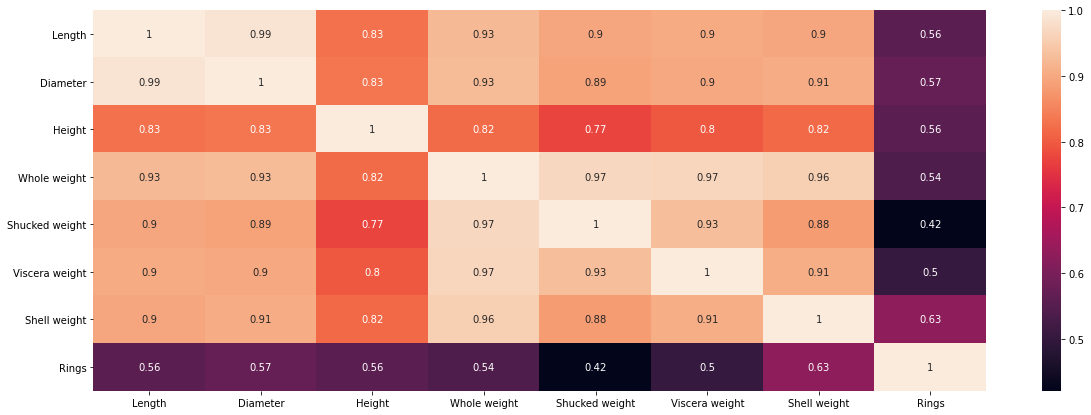

In [26]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

Length and diameter having very high corelation,whole weight is having high corelation with Shucked weight and Viscera weight and shell weight,Similarly length having ery high corelation with all the variables except Rings

# Data Pre processing and Feature Selection and Scaling

# Encoding

In [31]:
oe=OrdinalEncoder(categories=[['M','F','I']])

In [32]:
df['Sex']=oe.fit_transform(df['Sex'].values.reshape(-1,1))

# Removing Multi Collinearity problem

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
x=df.drop(['Rings'],axis=1)

In [35]:
vif=pd.DataFrame()
vif['Variables']=x.columns
vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [36]:
vif

,Variables,VIF factor
0,Sex,2.682127
1,Length,719.817749
2,Diameter,752.844073
3,Height,42.118898
4,Whole weight,422.411121
5,Shucked weight,101.614374
6,Viscera weight,63.677159
7,Shell weight,81.901274


Since length and Diameter are highly correlated we can drop length column from dataset as its corelation is less with target compared to Diameter

In [45]:
df_new=df.drop(['Length'],axis=1)

# Removing the outliers

In [94]:
z=np.abs(zscore(df_new))

In [95]:
df_new.shape

(4177, 8)

In [96]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  237,  238,  270,
        275,  277,  278,  294,  310,  313,  314,  334,  351,  355,  358,
        358,  362,  375,  416,  417,  428,  431,  433,  469,  478,  480,
        501,  526,  530,  572,  628,  673,  674,  675,  678,  694,  696,
        719,  720,  744,  754,  756,  811,  891,  891,  891, 1048, 1051,
       1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207,
       1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427,
       1427, 1427, 1428, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762,
       1762, 1762, 1763, 1763, 1763, 1821, 1982, 1987, 2051, 2090, 2108,
       2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2436, 2459,
       2471, 2544, 2623, 2624, 2624, 2624, 2625, 2709, 2710, 2710, 2810,
       2810, 2811, 2811, 2811, 2862, 2863, 2863, 2

In [175]:
df2=df_new[(z<3).all(axis=1)].reset_index(drop=True)

In [176]:
df2.shape

(4031, 8)

In [178]:
df2

,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.0,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1.0,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.0,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2.0,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4026,1.0,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4027,0.0,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4028,0.0,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4029,1.0,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [99]:
# percentage data lost
print((4177-4031)*100/4177)

3.4953315776873355


# Removing Skewness

In [100]:
df2.skew()

Sex               0.061181
Diameter         -0.607953
Height           -0.257638
Whole weight      0.333060
Shucked weight    0.457151
Viscera weight    0.436022
Shell weight      0.347931
Rings             0.721415
dtype: float64

In [179]:
#Split Data into label and target
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [180]:
X.shape

(4031, 7)

In [183]:
x_new=power_transform(X.drop(['Sex'],axis=1),method='yeo-johnson')
        

In [184]:
x=pd.DataFrame(x_new,columns=X.drop(['Sex'],axis=1).columns)

In [185]:
x['Sex']=X['Sex']

In [190]:
x.skew()

Diameter         -0.081537
Height           -0.015902
Whole weight     -0.017058
Shucked weight    0.021589
Viscera weight    0.035692
Shell weight      0.016418
Sex               0.061181
dtype: float64

we see that skewness removed from all the columns

In [136]:
x.shape

(4031, 6)

# Split data into test and train and Model training

In [236]:
#splitting the dataframe
maxr2Score=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    score=r2_score(y_test,pred_test)
    if score>maxr2Score:
        maxr2Score=score
        maxRS=i
print("the max acc is ",maxr2Score," at rs ",maxRS)

KeyboardInterrupt: 

In [237]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=125)

# Linear Regression

In [253]:
lr=LinearRegression()

In [254]:
 lr.fit(x_train,y_train)

LinearRegression()

In [255]:
pred_test=lr.predict(x_test)

In [256]:
score=r2_score(y_test,pred_test)

In [257]:
score

0.5953580295668851

# XgBoost Regression

In [209]:
xg=XGBRegressor()

In [210]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [213]:
pred_test=xg.predict(x_test)

In [214]:
score=r2_score(y_test,pred_test)
score

0.5372604460120425

# Random Forest Regression

In [217]:

rf = RandomForestRegressor()

In [218]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [219]:
pred_test=rf.predict(x_test)

In [220]:
score=r2_score(y_test,pred_test)
score

0.5913083299555844

# Decision Tree Regression

In [222]:
dtr=DecisionTreeRegressor()

In [223]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [224]:
pred_test=dtr.predict(x_test)

In [225]:
score=r2_score(y_test,pred_test)
score

0.24809761623367477

# Support Vector Regressor

In [227]:
sv=SVR()

In [228]:
sv.fit(x_train,y_train)

SVR()

In [229]:
pred_test=sv.predict(x_test)

In [230]:
score=r2_score(y_test,pred_test)
score

0.5892397227965842

# KNN Regression

In [232]:
kn=KNeighborsRegressor()

In [233]:
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [234]:
pred_test=kn.predict(x_test)

In [235]:
score=r2_score(y_test,pred_test)
score

0.5236545608144143

# LassoRegression

In [248]:
ls=Lasso(alpha=0.01)

In [249]:
ls.fit(x_train,y_train)

Lasso(alpha=0.01)

In [250]:
ls.predict(x_test)

array([ 6.62009559,  7.0385872 , 11.83555126, 11.45683835, 10.06377549,
       12.48986316, 12.12192594,  8.29403233,  6.68932556,  7.09711791,
       10.43732693, 12.29111295, 12.55418059, 10.08010173,  7.29726273,
       11.90336926,  6.92036986,  8.03597804, 10.37344966,  8.99587923,
       12.78628769, 10.73162225,  8.30030882,  8.96160315, 11.09931264,
       11.14787672,  8.45705043, 12.40624454, 12.95312537, 12.1397448 ,
       10.77188787, 10.07754755,  7.94950097, 11.86733901,  7.69615875,
        9.26460969, 10.67524397,  9.10472945,  9.55393369,  7.76934445,
        9.47812303, 10.88290844, 10.06396978, 10.37365175,  8.49813744,
        9.96111351,  8.92666861, 10.23139332, 12.29662109,  6.92774041,
       11.13168836, 12.19388703, 11.32508968, 11.47385723,  7.94424502,
        8.78302551,  7.64401779,  7.42500365, 11.33801151, 10.14022424,
        9.57403772, 10.07275055, 10.6681455 ,  9.4228027 ,  8.12516657,
        8.01109832, 10.91238983,  9.63745907,  9.65032079, 12.20

In [251]:
score=r2_score(y_test,pred_test)
score

-0.5186756247520512

# Checking Cross Validation Score

In [258]:
scr=cross_val_score(lr,x,y,cv=5)
print("the cross validation score for linear regression is",scr.mean())

the cross validation score for linear regression is 0.43803093938800136


In [262]:
scr2=cross_val_score(dtr,x,y,cv=5)
print("the cross validation score for decision tree regressor is",scr2.mean())

the cross validation score for decision tree classifier is -0.026142573421039362


In [263]:
scr3=cross_val_score(rf,x,y,cv=5)
print("the cross validation score for random forest regressor is",scr3.mean())

the cross validation score for random forest classifier is 0.4522349163309835


In [264]:
scr4=cross_val_score(sv,x,y,cv=5)
print("the cross validation score for support vector regressor is",scr4.mean())

the cross validation score for support vector classifier is 0.5007746050820187


In [265]:
scr5=cross_val_score(kn,x,y,cv=5)
print("the cross validation score for Kn regressor is",scr5.mean())

the cross validation score for Kn regressor is 0.3951144125308231


# Hyper Parameter Tuning

In [266]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 


In [268]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

In [269]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.441 total time=   1.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.383 total time=   0.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.443 total time=   0.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.412 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.409 total time=   0.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.443 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.401 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.476 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.428 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.416 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.345 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.390 total time=  32.2s
[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.045 total time=  46.3s
[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.228 total time=  52.1s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.509 total time=  42.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.533 total time=   6.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.505 total time=   5.6s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.569 total time=   4.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.499 total time=   6.5s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.518 total time=   6.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.558 total time=   1.8s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.508 total time=   1.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.580 total time=   1.9s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [270]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [271]:
sv=SVR(C=10,gamma=0.1,kernel='rbf')

In [272]:
sv.fit(x_train,y_train)

SVR(C=10, gamma=0.1)

In [273]:
sv.predict(x_test)

array([ 5.4912627 ,  6.65343324, 10.6741583 , 10.98529374, 10.08249478,
       14.06809306, 11.35352967,  8.5869756 ,  5.56264824,  6.35294199,
       10.87428028, 11.98611575, 11.25175547,  9.53102522,  7.95902292,
       10.74026275,  5.56188859,  7.76104383, 10.72644886,  8.4377322 ,
       12.20023381, 11.25439515,  8.01663404,  8.78959118, 10.42759063,
       11.32966998,  8.11650626, 10.46707073, 13.00224156, 12.24659621,
       10.08502444, 11.91196016,  7.46646808, 10.73839601,  7.05947743,
        9.14273154, 10.20054465,  9.9743315 , 10.11281451,  7.43447612,
       10.02038829, 11.55639503,  9.77881923, 10.1379428 ,  8.10284809,
        9.60681803,  8.84643088, 10.48885063, 11.09273512,  6.24387168,
       10.90697778, 12.56890665, 11.59942722, 12.36215777,  7.63534118,
        8.2853783 ,  7.21708341,  7.00353108, 11.14829737,  9.58301162,
       10.01926542, 10.67561458, 10.0866132 ,  9.81881124,  7.84354302,
        8.12137204,  9.95470125,  9.7864927 , 10.17377141, 10.93

In [274]:
score=r2_score(y_test,pred_test)
score

0.5953580295668851

In [275]:
mean_absolute_error(y_test,pred_test)

1.4251282610375666

In [276]:
scr4=cross_val_score(sv,x,y,cv=5)
print("the cross validation score for support vector regressor is",scr4.mean())

the cross validation score for support vector regressor is 0.5117191511349096


In [ ]:
By hyper tuning we improved cv and also r2 score

# Model Saving

In [278]:
joblib.dump(sv,"AbaloneAgeModel.pkl")

['AbaloneAgeModel.pkl']